# Coffee Sales EDA

![coffee_image](../../assets/coffee-image.jpeg "alt-coffee_image")

## About Author

Author: Joshua Farara

Project: Cofee Sales EDA

### Contact Info
Click on link below to contact/follow/correct me:

Email: joshua.farara@gmail.com

[LinkedIn](https://www.linkedin.com/in/joshuafarara/)

[Facebook](https://www.facebook.com/josh.farara/)

[Twitter](https://x.com/FararaTheArtist)

[Github](https://github.com/JoshuaFarara)


## About Data

Title: Dataset Title

Dataset: [Link](https://www.kaggle.com/datasets/ihelon/coffee-sales/data)

Description of data:

This dataset contains detailed records of coffee sales from a vending machine. It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products. 

### Dataset Columns Names

Features:

'date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'




### Metadata

Source:  Yaroslav Isaienkov @ihelon

Collection Methodology:  The dataset spans from March 2024 to June 2024, capturing daily transaction data. And it's continue added new information.

License: CC0: Public Domain



### Task

Exploratory data analysis to extract useful insights while observing vending machine coffee sales in Ukraine.

### Objectives

Derive analytical questions that can be used by other coffee vending providers, cofee shops, cofee companies and other related sales trends. 

### Kernel Version Used

Python==3.11.7

## Import Libraries

We will use the following libraries¶
1. Pandas: Data manipulation and analysis
2. Numpy: Numerical operations and calculations
3. Matplotlib: Data visualization and plotting
4. Seaborn: Enhanced data visualization and statistical graphics
5. Scipy: Scientific computing and advanced mathematical operations

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy as sp

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import sys

# # Get the directory of the current script
# script_dir = os.path.dirname(os.path.abspath(__file__))

# # Change the working directory to the script's directory
# os.chdir(script_dir)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data Loading and Exploration | Cleaning

### Load a CSV file and creating a dataframe

In [2]:
# Kaggle Notebook
# df = pd.read_csv('/kaggle/input/coffee-sales/index.csv')


#Local Machine Notebook
df = pd.read_csv('../../data/coffee_sales_data.csv')


### Set the option to show maximum columns

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

### Get a sneak peek of data
The purpose of a sneak peek is to get a quick overview of the data and identify any potential problems or areas of interest

In [4]:
df.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


### Let's see the column names

In [5]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

### Let's have a look on the shape of the dataset

In [6]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 896, and columns are 6.


### Let's have a look on the columns and their data types using detailed info function

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   datetime     896 non-null    object 
 2   cash_type    896 non-null    object 
 3   card         807 non-null    object 
 4   money        896 non-null    float64
 5   coffee_name  896 non-null    object 
dtypes: float64(1), object(5)
memory usage: 42.1+ KB


### Count the missing values

In [8]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

## Cleaning Set 1

* There are 896 rows, and 6 columns in the dataset.

* The data type of all columns are objects except for df['money'] which is float.

* The columns in the datasets are:
    * 'date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'
    
* There are a few missing values in the dataset, which we will read in detail and deal with later on in the notebook.

* rename columns 'cash_type':'payment_type','card':'card_number', 'money':'amount_paid_uah'

* datetime converrted to a datetime dtype.

* money column after renaming 'amount_paid_uah' can derive an exchanged USD column for later comparison and analysis




## Changing column names 

Changed: cash_type to payment_type since cash and card payments are accepted

In [9]:
df.rename(columns={'cash_type':'payment_type', 'card':'card_number', 'money':'amount_paid_uah'}, inplace=True)

In [10]:
df.columns

Index(['date', 'datetime', 'payment_type', 'card_number', 'amount_paid_uah',
       'coffee_name'],
      dtype='object')

## Creating Time Column

In [11]:
df[['new_date', 'time']] = df['datetime'].str.split(' ', n=1, expand=True)
df = df.drop(['new_date'], axis=1)
# df = df.drop(['new_date', 'datetime'], axis=1)
# df = ['date', 'time', 'payment_type', 'card_number', 'amount_paid_usd', 'coffee_name']

## Coverting datetime Column from object to datetime64 dtype

In [12]:
df['datetime']= pd.to_datetime(df['datetime'])
# Check type for the time column
# df['datetime'].info
df.head(10)

,date,datetime,payment_type,card_number,amount_paid_uah,coffee_name,time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk,15:39:47.726
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate,16:19:02.756
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk,18:39:03.580
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa,19:22:01.762
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk,19:23:15.887


### Creating hour, day, month columns

In [13]:
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month


## Convert amount_paid_uah(formerly df['money']) to USD.

.024 USD  = 1 Ukrainian hryvnia

1 USD = 40.3317	Ukrainian hryvnia

In [14]:
UAH_to_USD = .024
df['amount_paid_usd'] = df['amount_paid_uah'] * UAH_to_USD

## Restructure dateframe order.

In [15]:
df = df[['date', 'datetime','time', 'hour', 'day', 'month', 'payment_type', 'card_number', 'amount_paid_uah', 'amount_paid_usd',
       'coffee_name']]
df.head()

,date,datetime,time,hour,day,month,payment_type,card_number,amount_paid_uah,amount_paid_usd,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,10:15:50.520,10,1,3,card,ANON-0000-0000-0001,38.7,0.9288,Latte
1,2024-03-01,2024-03-01 12:19:22.539,12:19:22.539,12,1,3,card,ANON-0000-0000-0002,38.7,0.9288,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,12:20:18.089,12,1,3,card,ANON-0000-0000-0002,38.7,0.9288,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,13:46:33.006,13,1,3,card,ANON-0000-0000-0003,28.9,0.6936,Americano
4,2024-03-01,2024-03-01 13:48:14.626,13:48:14.626,13,1,3,card,ANON-0000-0000-0004,38.7,0.9288,Latte


## Analytical Questions

Sales Analysis :

1. Total Revenue

2. Total Sales per Coffee 

3. Average amount paid per cup 
 
4. Average amount paid per cup for each coffee type in UAH

5. Which coffee had the highest/lowest sales?

6. Number of coffee sales for each coffee name?


Dates and Time analysis:

6. Sales by Transaction Date

7. Dates With the Highest Number of sales?

8. Coffee Sales by Hour of the Day

9. Coffee sales by hour of the day  per coffee type

10. How many coffees sold in the morning, afternoon, evening?

11. Which coffee is sold most/least during the week/weekend?


Consumer analysis:

12.  Card Numbers With the Most Purchases

11. Total amount spent by each card numbers

12. Coffees Bought by each buyer

13. What is the ratio amongst card consumers and cash consumers?

16. Do cash consumers spend more then card counterparts?--

Currency analysis:

17. What is the exchange rate between UAH and USD at the time of this data? Compared to the average?

18. 

### Coffee Sales Report

#### Sales Analysis:

In [16]:
# Convert coffee_name to str
df['coffee_name'] = df['coffee_name'].astype('str') 

##### Total Revenue

In [17]:
# 1. Total Revenue
total_revenue_uah = df['amount_paid_uah'].sum()
total_revenue_usd = df['amount_paid_usd'].sum()
print(f"Total Revenue (UAH): {total_revenue_uah}, Total Revenue (USD): {total_revenue_usd}")

Total Revenue (UAH): 30592.940000000002, Total Revenue (USD): 734.23056


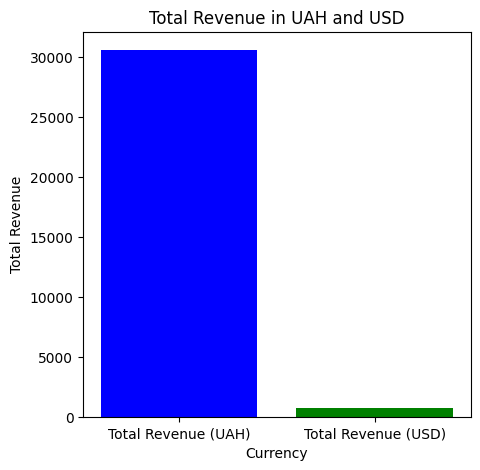

In [18]:
# Plot total revenue
plt.figure(figsize=(5, 5))
plt.bar(['Total Revenue (UAH)', 'Total Revenue (USD)'], [total_revenue_uah, total_revenue_usd], color=['blue', 'green'])
plt.xlabel('Currency')
plt.ylabel('Total Revenue')
plt.title('Total Revenue in UAH and USD')
# plt.savefig('./visualizations/Total Revenue in UAH and USD.jpg')
plt.show()

In [136]:
# df.groupby('coffee_name')
# Group data by coffee_name
grouped_coffee = df.groupby('coffee_name')
grouped_coffee['hour'].head()

0      10
1      12
2      12
3      13
4      13
5      15
6      16
7      18
8      19
9      19
10     19
11     10
12     10
13     10
15     14
17     17
18     10
19     10
20     11
21     12
22     13
23     17
24     17
27     18
31     14
36     17
39     17
43     13
44     14
45     14
52     10
53     12
61     12
63     12
69     13
77     11
100    12
102    15
142    16
159    13
Name: hour, dtype: int32

In [20]:
# 2. Total Sales per Coffee Type in UAH
total_revenue_per_coffee_type_uah = grouped_coffee['amount_paid_uah'].sum().sort_values(ascending=False)
print(total_revenue_per_coffee_type_uah)

coffee_name
Latte                  7151.62
Americano with Milk    6738.14
Cappuccino             6253.50
Americano              3786.42
Cortado                2422.80
Hot Chocolate          2417.46
Cocoa                   995.66
Espresso                827.34
Name: amount_paid_uah, dtype: float64


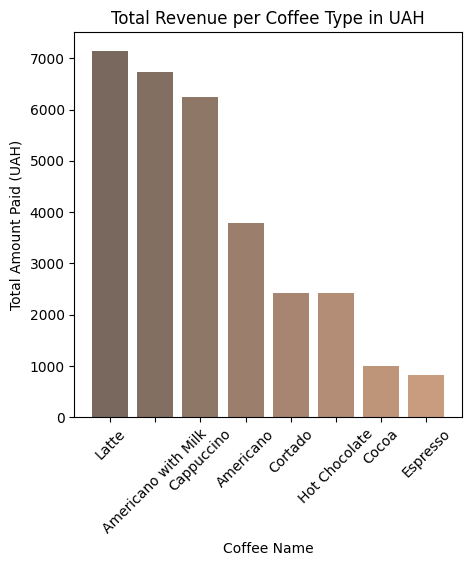

In [97]:
# Plot total sales per coffee type in UAH
browns = plt.cm.copper(np.linspace(0.2, 1, 16))
plt.figure(figsize=(5, 5))
plt.bar(total_revenue_per_coffee_type_uah.index, total_revenue_per_coffee_type_uah, alpha=0.7, color=browns)
plt.xlabel('Coffee Name')
plt.ylabel('Total Amount Paid (UAH)')
plt.title('Total Revenue per Coffee Type in UAH')
plt.xticks(rotation=45)
# plt.savefig('./visualizations/Total Sales per Coffee Type in UAH.jpg')
plt.show()

##### Total Revenue by Coffee Name Avanced Plotting UAH vs. USD Scaled

In [22]:
# Group by coffee_name and calculate total revenue
total_revenue_uah_coffee = df.groupby('coffee_name')['amount_paid_uah'].sum().sort_values(ascending=False)
total_revenue_usd_coffee = df.groupby('coffee_name')['amount_paid_usd'].sum().sort_values(ascending=False)

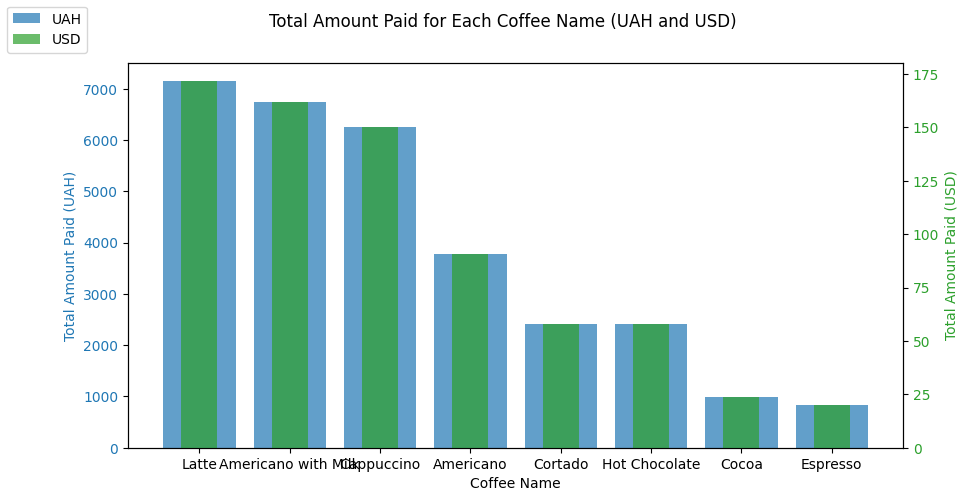

In [23]:
# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot UAH data
color = 'tab:blue'
ax1.set_xlabel('Coffee Name')
ax1.set_ylabel('Total Amount Paid (UAH)', color=color)
bars1 = ax1.bar(total_revenue_uah_coffee.index, total_revenue_uah_coffee, alpha=0.7, label='UAH', color=color,  align='center')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for USD data
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Amount Paid (USD)', color=color)
bars2 = ax2.bar(total_revenue_usd_coffee.index, total_revenue_usd_coffee, alpha=0.7, label='USD', color=color, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(rotation=45)

# Title and legend
fig.suptitle('Total Amount Paid for Each Coffee Name (UAH and USD)')
fig.legend([bars1, bars2], ['UAH', 'USD'], loc='upper left')

# plt.savefig('./visualizations/Total Amount Paid for Each Coffee Name (UAH and USD).jpg')
# plt.close()
# Show plot
plt.show()

##### Average amount paid per cup

In [24]:
# 3. Average amount paid per cup
df['amount_paid_uah'].mean()

np.float64(34.14390625)

##### Average Amount Paid by Coffee Name UAH and USD

In [25]:
# 4. Average Amount Paid per Cup in UAH and USD
average_amount_paid_uah = grouped_coffee['amount_paid_uah'].mean()
average_amount_paid_usd = grouped_coffee['amount_paid_usd'].mean()
print(average_amount_paid_uah)
print(average_amount_paid_usd)

coffee_name
Americano              28.469323
Americano with Milk    33.192808
Cappuccino             38.131098
Cocoa                  38.294615
Cortado                28.503529
Espresso               23.638286
Hot Chocolate          38.372381
Latte                  38.243957
Name: amount_paid_uah, dtype: float64
coffee_name
Americano              0.683264
Americano with Milk    0.796627
Cappuccino             0.915146
Cocoa                  0.919071
Cortado                0.684085
Espresso               0.567319
Hot Chocolate          0.920937
Latte                  0.917855
Name: amount_paid_usd, dtype: float64


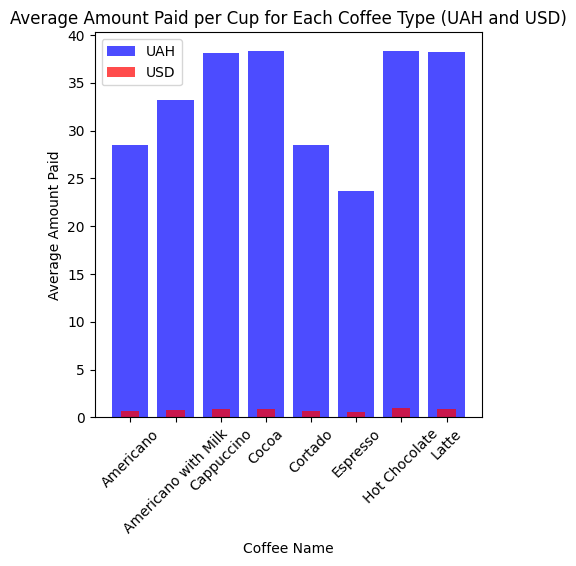

In [26]:
# Plot average amount paid per cup for each coffee type in UAH and USD
plt.figure(figsize=(5, 5))
plt.bar(average_amount_paid_uah.index, average_amount_paid_uah, alpha=0.7, label='UAH', color='blue')
plt.bar(average_amount_paid_usd.index, average_amount_paid_usd, alpha=0.7, label='USD', color='red', width=0.4)
plt.xlabel('Coffee Name')
plt.ylabel('Average Amount Paid')
plt.title('Average Amount Paid per Cup for Each Coffee Type (UAH and USD)')
plt.legend()
plt.xticks(rotation=45)
# plt.savefig('./visualizations/Average Amount Paid per Cup for Each Coffee Type (UAH and USD).jpg')
# plt.close()
plt.show()

#### Number of Coffees Sold for each Coffee Name 

In [107]:
# Number of Coffees Sold for each Coffee Name 
number_of_sales_by_coffee_name = df['coffee_name'].value_counts()

print("Number of Coffees Sold for each Coffee Name:\n", number_of_sales_by_coffee_name)

Number of Coffees Sold for each Coffee Name :
 coffee_name
Americano with Milk    203
Latte                  187
Cappuccino             164
Americano              133
Cortado                 85
Hot Chocolate           63
Espresso                35
Cocoa                   26
Name: count, dtype: int64


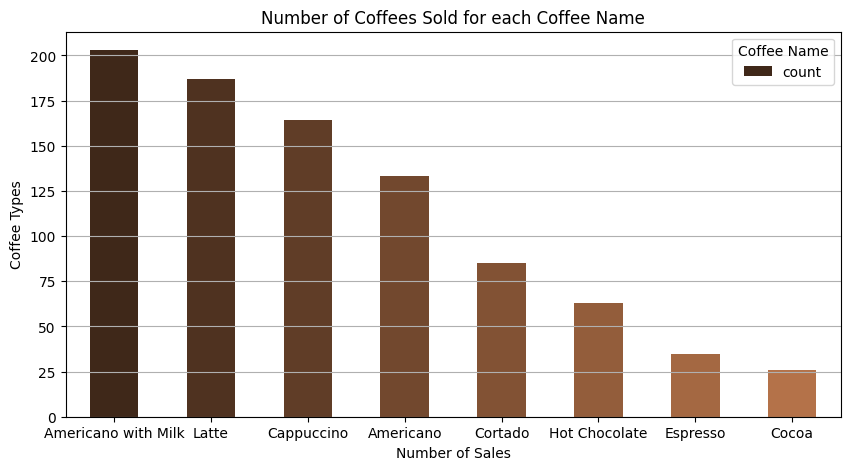

In [121]:
# Plot Number of Coffees Sold for each Coffee Name
plt.figure(figsize=(10, 5))
number_of_sales_by_coffee_name.plot(kind='bar', color=browns)
plt.title('Number of Coffees Sold for each Coffee Name')
plt.xlabel('Number of Sales')
plt.ylabel('Coffee Types')
plt.legend(title='Coffee Name')
plt.xticks(rotation=0)
plt.grid(axis='y', )
plt.show()


#### Dates and Time analysis:

In [27]:
df.head

<bound method NDFrame.head of            date                datetime          time  hour  day  month  \
0    2024-03-01 2024-03-01 10:15:50.520  10:15:50.520    10    1      3   
1    2024-03-01 2024-03-01 12:19:22.539  12:19:22.539    12    1      3   
2    2024-03-01 2024-03-01 12:20:18.089  12:20:18.089    12    1      3   
3    2024-03-01 2024-03-01 13:46:33.006  13:46:33.006    13    1      3   
4    2024-03-01 2024-03-01 13:48:14.626  13:48:14.626    13    1      3   
5    2024-03-01 2024-03-01 15:39:47.726  15:39:47.726    15    1      3   
6    2024-03-01 2024-03-01 16:19:02.756  16:19:02.756    16    1      3   
7    2024-03-01 2024-03-01 18:39:03.580  18:39:03.580    18    1      3   
8    2024-03-01 2024-03-01 19:22:01.762  19:22:01.762    19    1      3   
9    2024-03-01 2024-03-01 19:23:15.887  19:23:15.887    19    1      3   
10   2024-03-01 2024-03-01 19:29:17.391  19:29:17.391    19    1      3   
11   2024-03-02 2024-03-02 10:22:06.957  10:22:06.957    10    2      

##### Sales by Transaction Date

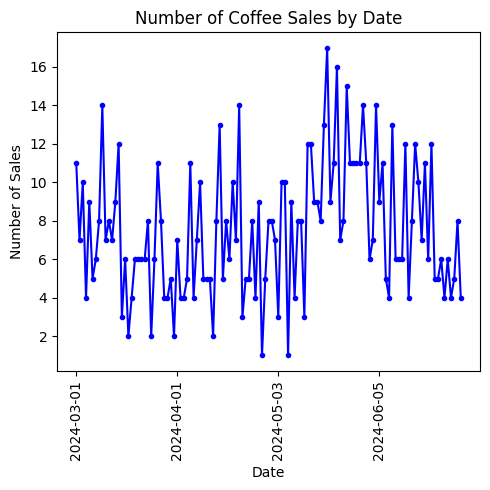

In [74]:
number_of_sales_by_date = df['date'].value_counts().sort_index()
number_of_sales_by_date
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(number_of_sales_by_date.index, number_of_sales_by_date.values, 'b.-') 


plt.xticks(number_of_sales_by_date.index[::31], rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.title('Number of Coffee Sales by Date')
plt.tight_layout()

plt.show()


##### Dates With the Highest Number of Sales

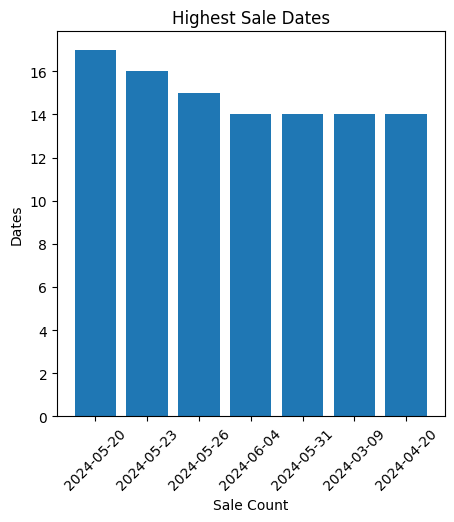

In [122]:
highest_sale_dates = df['date'].value_counts().head(7)
plt.figure(figsize=(5, 5))
plt.bar(highest_sale_dates.index, highest_sale_dates)
plt.xlabel('Sale Count')
plt.ylabel('Dates')
plt.title('Highest Sale Dates')
plt.xticks(rotation=45)
plt.show()

##### Coffee Sales by Hour of the Day

In [86]:
# coffee_sales_by_hour = total_amount_paid_uah
coffee_sales_by_hour = df.groupby('hour')['coffee_name'].count()
print(coffee_sales_by_hour)

hour
7       8
8      26
9      24
10    110
11     77
12     73
13     66
14     65
15     59
16     63
17     66
18     69
19     81
20     42
21     53
22     14
Name: coffee_name, dtype: int64


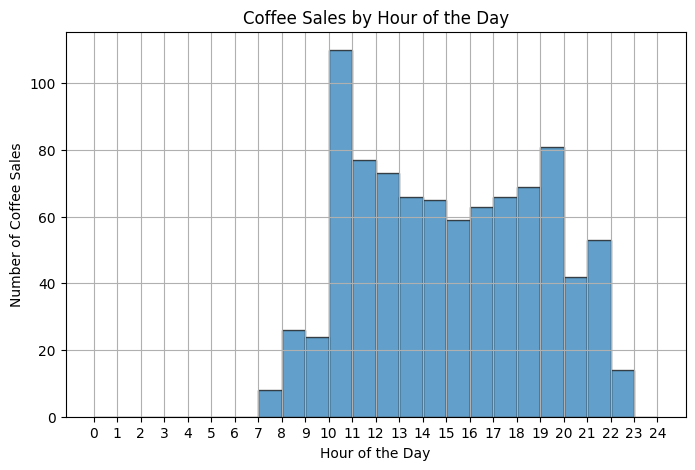

In [154]:
# Create a histogram to visualize Coffee Sales by hour
plt.figure(figsize=(8, 5))
plt.hist(df['hour'], bins=24, range=(0, 24), edgecolor='black', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Coffee Sales')
plt.title('Coffee Sales by Hour of the Day')
plt.xticks(range(0, 25))
plt.grid(True)
plt.show()

##### Coffee sales by hour of the day  per coffee type

In [92]:
# Coffee sales by hour of the day  per coffee type
coffee_sales_by_hour_per_coffee = pd.crosstab(df['hour'], df['coffee_name'])
print(coffee_sales_by_hour_per_coffee)

coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
hour                                                                      
7                    4                    2           0      0        1   
8                    5                    4           7      0        4   
9                    3                    7           1      1        3   
10                  16                   22           9      3        7   
11                  14                   16          13      1       12   
12                  13                   20          13      2        7   
13                  18                   13          10      1       11   
14                  13                   17          13      2        6   
15                  14                   13           7      0        3   
16                  10                   12          10      3       11   
17                   8                    9          14      4        5   
18                   9   

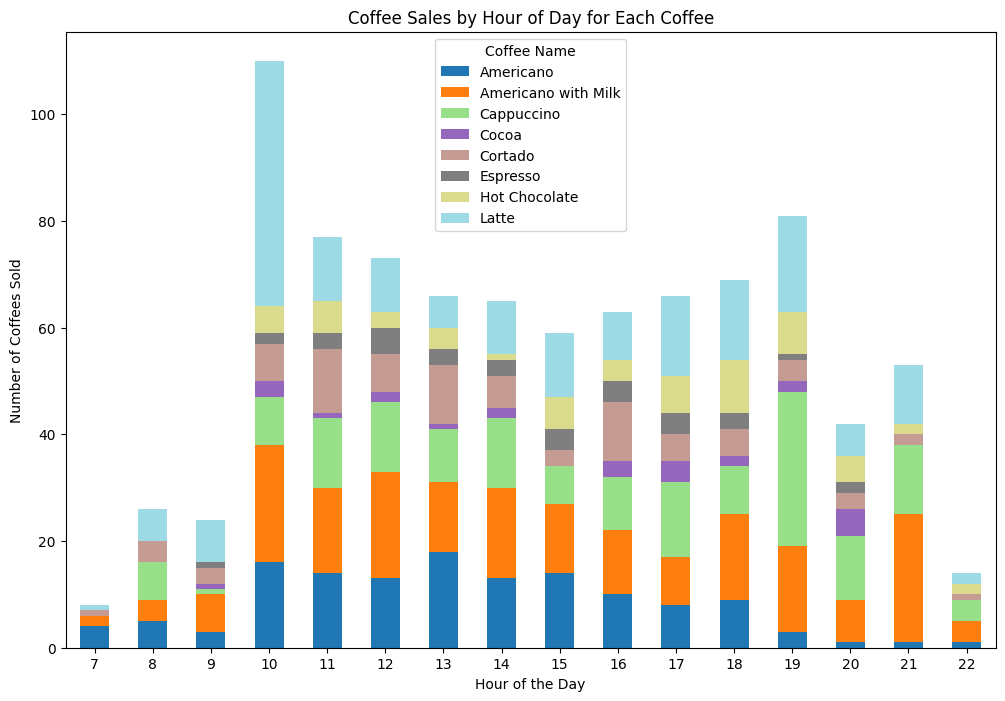

In [89]:
coffee_sales_by_hour_per_coffee.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Coffee Sales by Hour of Day for Each Coffee')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Coffees Sold')
plt.legend(title='Coffee Name')
plt.xticks(rotation=0)
plt.show()

#### Categorize Morning, Afternoon and Evening Time

morning is 6am-12pm  --> 06:00:00 - 12:00:00

afternoon is 12pm - 6pm -->  12:01:00 - 18:00:00

evening is 6pm - 12 am -->  18:01:00- 00:00:00

night 12am - 6am -->  00:00:00 - 06:00:00

##### First Conditional Approach
using function to filter on time condition into day cylce categorizatioin

In [138]:
def day_cycle(hour):
    if 6 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    elif 18 <= hour <= 23:
        return 'evening'
    elif 0 <= hour <= 5:
        return 'night'

df['day_cycle'] = df['hour'].apply(day_cycle)
print(df['day_cycle'])

0        morning
1      afternoon
2      afternoon
3      afternoon
4      afternoon
5      afternoon
6      afternoon
7        evening
8        evening
9        evening
10       evening
11       morning
12       morning
13       morning
14       morning
15     afternoon
16     afternoon
17     afternoon
18       morning
19       morning
20       morning
21     afternoon
22     afternoon
23     afternoon
24     afternoon
25       evening
26       evening
27       evening
28       morning
29       morning
30       morning
31     afternoon
32       morning
33     afternoon
34     afternoon
35     afternoon
36     afternoon
37     afternoon
38     afternoon
39     afternoon
40       evening
41     afternoon
42     afternoon
43     afternoon
44     afternoon
45     afternoon
46       morning
47       morning
48       morning
49       morning
50     afternoon
51     afternoon
52       morning
53     afternoon
54     afternoon
55     afternoon
56     afternoon
57     afternoon
58       eveni

##### Second Lambda Approach
using lambda to filter on time condition into day cylce categorizatioin

In [139]:
df['day_cycle'] = df['hour'].apply(lambda hour: 'morning' if 6 <= hour <= 11 else 
                                                'afternoon' if 12 <= hour <= 17 else 
                                                'evening' if 18 <= hour <= 23  else 
                                                'night')

df['day_cycle'].value_counts()

day_cycle
afternoon    392
evening      259
morning      245
Name: count, dtype: int64

#### Coffee Sales by the Day of the Week

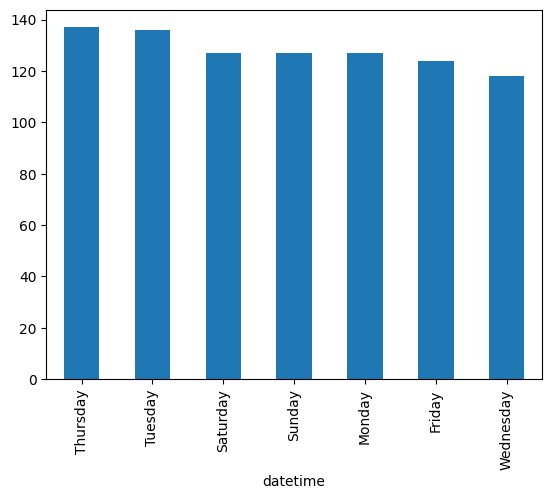

In [147]:
weekday_sales = df['datetime'].dt.day_name().value_counts()
weekday_sales.plot(kind='bar')
plt.show()

# order the days of the week

##### Days of the Week with the Highest Number of Sales
Tuesday and Thursday

### Consumer Analysis

#### Card Numbers With the Most Purchases

In [155]:
df['payment_type'].head()

0    card
1    card
2    card
3    card
4    card
Name: payment_type, dtype: object

In [161]:
most_purchases = df['card_number'].sort_values().value_counts().head(10)
print(f' Card Numbers With the Most Purchases: {most_purchases}')

 Card Numbers With the Most Purchases: card_number
ANON-0000-0000-0012    76
ANON-0000-0000-0009    54
ANON-0000-0000-0003    22
ANON-0000-0000-0097    20
ANON-0000-0000-0001    17
ANON-0000-0000-0040    17
ANON-0000-0000-0141    16
ANON-0000-0000-0180    12
ANON-0000-0000-0024    12
ANON-0000-0000-0134    11
Name: count, dtype: int64


#### Total amount spent by each card number

In [162]:
# Calculate total amount spent by each card number
total_spent_by_card = df.groupby('card_number')['amount_paid_uah'].sum().sort_values(ascending=False)

# Select the top 10 spenders
top_spenders = total_spent_by_card.head(10)
top_spenders

card_number
ANON-0000-0000-0012    2297.34
ANON-0000-0000-0009    1912.42
ANON-0000-0000-0097     681.88
ANON-0000-0000-0001     646.14
ANON-0000-0000-0003     628.94
ANON-0000-0000-0040     576.56
ANON-0000-0000-0141     451.62
ANON-0000-0000-0180     442.84
ANON-0000-0000-0024     422.26
ANON-0000-0000-0134     405.12
Name: amount_paid_uah, dtype: float64

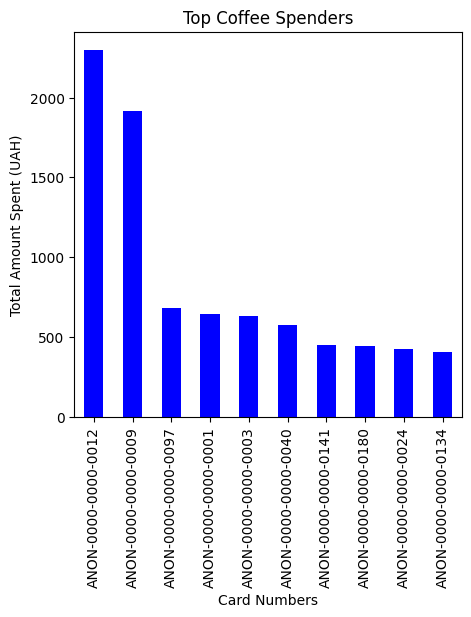

In [163]:
plt.figure(figsize=(5, 5))
top_spenders.plot(kind='bar', color='blue')
plt.xlabel('Card Numbers')
plt.ylabel('Total Amount Spent (UAH)')
plt.xticks(rotation=90)
plt.title('Top Coffee Spenders')
# plt.savefig('./visualizations/Top_Coffee_Spenders.jpg')
# plt.close()
plt.show()

#### Coffees Bought by each buyer

In [164]:
# Group by card_number and coffee_name to get the count of each coffee purchased by each buyer
coffee_purchases_by_buyer = df.groupby(['card_number', 'coffee_name']).size().unstack(fill_value=0)

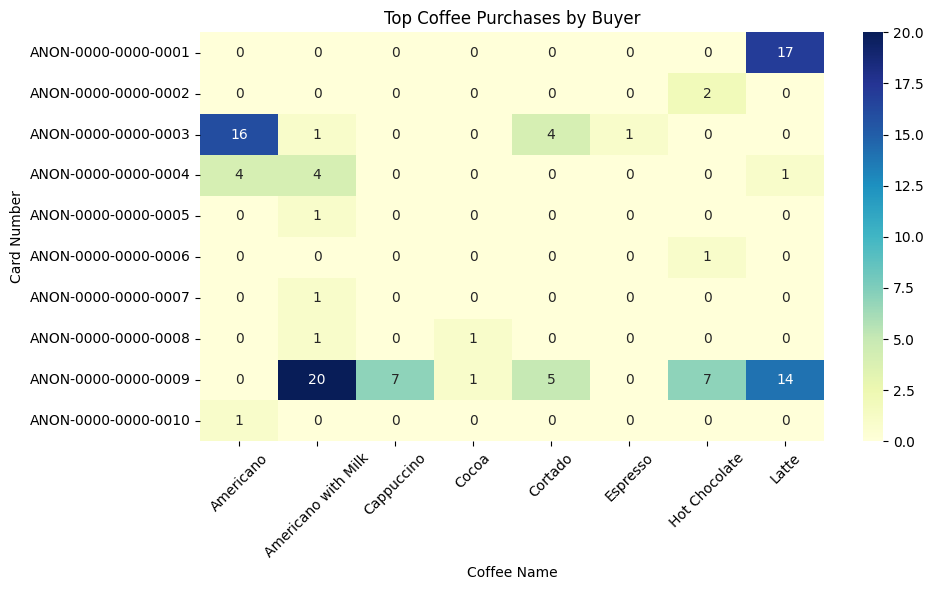

In [165]:
plt.figure(figsize=(10, 6))
sns.heatmap(coffee_purchases_by_buyer[0:10], annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Coffee Name')
plt.ylabel('Card Number')
plt.title('Top Coffee Purchases by Buyer')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Ratio amongst Card Consumers and Cash Spenders

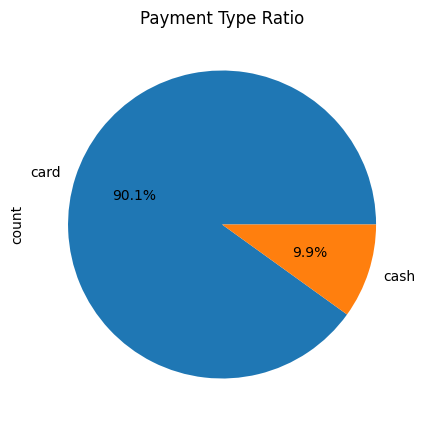

In [166]:
plt.figure(figsize = (5,5))
df['payment_type'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.title('Payment Type Ratio')
plt.show()

#### Revenue Comparison amongst Card and Cash Consumers

In [167]:
df.groupby('payment_type')['amount_paid_uah'].sum()
# df[['payment_type', 'amount_paid_uah']].sum()

payment_type
card    27406.94
cash     3186.00
Name: amount_paid_uah, dtype: float64

### Currency Analysis

#### Exchange Rate analysis 